In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

import pickle

%matplotlib inline


In [4]:
#Load dataset
datamobil = pd.read_csv("skripsi.csv")

In [ ]:
datamobil.head()

,Mobil,Tahun,Jarak,Tipe,Gearbox,BBM,CC,Warna,Kapasitas,Harga
0,Nissan,2022,894,Dual Cab Pick-up,Manual,Diesel,2298,White,5,66888
1,Mazda,2022,2001,Wagon,Automatic,Unleaded Petrol,2488,Grey,7,60999
2,Toyota,2022,16324,Cab Chassis,Automatic,Unleaded Petrol,2694,White,2,31990
3,Nissan,2022,2000,Dual Cab Pick-up,Manual,Diesel,2298,White,5,41888
4,Nissan,2022,1452,Dual Cab Pick-up,Automatic,Diesel,2298,Grey,5,64490


In [ ]:
datamobil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8600 entries, 0 to 8599
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Mobil      8600 non-null   object
 1   Tahun      8600 non-null   int64 
 2   Jarak      8600 non-null   int64 
 3   Tipe       8600 non-null   object
 4   Gearbox    8600 non-null   object
 5   BBM        8600 non-null   object
 6   CC         8600 non-null   int64 
 7   Warna      8600 non-null   object
 8   Kapasitas  8600 non-null   int64 
 9   Harga      8600 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 672.0+ KB


In [ ]:
datamobil

,Mobil,Tahun,Jarak,Gearbox,BBM,CC,Warna,Kapasitas,Harga
0,Nissan,2022,894,Manual,Diesel,2298,White,5,66888
1,Mazda,2022,2001,Automatic,Unleaded Petrol,2488,Grey,7,60999
2,Toyota,2022,16324,Automatic,Unleaded Petrol,2694,White,2,31990
3,Nissan,2022,2000,Manual,Diesel,2298,White,5,41888
4,Nissan,2022,1452,Automatic,Diesel,2298,Grey,5,64490
...,...,...,...,...,...,...,...,...,...
8595,Toyota,1994,380494,Automatic,Unleaded Petrol,4477,Blue,8,19990
8596,Mitsubishi,1993,109654,Manual,Unleaded Petrol,1997,White,8,5300
8597,Toyota,1990,75000,Automatic,Unleaded Petrol,1587,blue,5,2900
8598,Nissan,1990,288654,Manual,Unleaded Petrol,4169,Black,7,10999


# **Cek variabel**


In [ ]:
datamobil["Mobil"].value_counts()

Toyota        2768
Mazda         1167
Hyundai       1087
Mitsubishi    1075
Nissan        1008
Subaru         655
Honda          413
Isuzu          267
Suzuki         160
Name: Mobil, dtype: int64

In [ ]:
datamobil["Tahun"].value_counts()

2018    1017
2017     975
2019     902
2016     684
2015     549
2020     537
2021     502
2022     494
2014     459
2013     459
2012     359
2010     264
2011     254
2009     219
2008     210
2007     183
2006     149
2005     116
2004      78
2003      69
2002      34
2001      25
2000      24
1998      11
1999       8
1997       7
1996       5
1995       2
1990       2
1994       1
1993       1
1989       1
Name: Tahun, dtype: int64

In [ ]:
datamobil["Jarak"].value_counts()

10        55
6         18
2001      16
7         15
15        10
          ..
112286     1
182482     1
55640      1
67495      1
132918     1
Name: Jarak, Length: 7803, dtype: int64

In [ ]:
datamobil["Tipe"].value_counts()

Wagon                    4212
Hatchback                1340
Sedan                    1070
Dual Cab Pick-up          346
Dual Cab Utility          329
Cab Chassis               280
Double Cab Pick Up        200
Van                       190
Crew Cab Utility          123
Double Cab Utility        119
Double Cab Chassis         85
Coupe                      77
Dual Cab Chassis           61
Crew Cab Chassis           20
Bus                        19
X Cab Pickup               13
Space Cab Chassis          11
Freestyle Cab Chassis      11
Space Cab Utility          10
King Cab Pickup             8
X Cab Cab Chassis           8
Liftback                    7
Troop Carrier               6
Convertible                 6
Club Cab Chassis            5
Crew Van                    5
X Cab Utility               5
Utility                     5
Fastback                    4
Leaf Cab Chassis            4
Club Cab Pickup             3
Freestyle Utility           3
Club Cab Utility            3
Coil Cab C

In [ ]:
datamobil["Gearbox"].value_counts()

Automatic    7019
Manual       1581
Name: Gearbox, dtype: int64

In [ ]:
datamobil["BBM"].value_counts()

Unleaded Petrol              4790
Diesel                       2908
Premium Unleaded Petrol       592
Unleaded Petrol/Electric      238
Premium Unleaded/Electric      72
Name: BBM, dtype: int64

In [ ]:
datamobil["CC"].value_counts()

2488    797
1998    659
1999    373
2753    352
1798    318
       ... 
2496      1
1795      1
3907      1
1328      1
3980      1
Name: CC, Length: 139, dtype: int64

In [ ]:
datamobil["Warna"].value_counts()

White       3267
Silver      1364
Grey        1181
Blue         805
Black        704
            ... 
whitw          1
Liquid         1
crystal        1
GOLD           1
Darkblue       1
Name: Warna, Length: 108, dtype: int64

In [ ]:
datamobil["Kapasitas"].value_counts()

5     6291
7     1423
2      276
3      218
4      179
8      175
14      19
6       18
11       1
Name: Kapasitas, dtype: int64

In [ ]:
datamobil["Harga"].value_counts()

29990    158
24990    115
34990    112
28990    109
27990     99
        ... 
74915      1
26862      1
26882      1
52915      1
2900       1
Name: Harga, Length: 2162, dtype: int64

In [ ]:
datamobil["Harga"].describe()

count      8600.000000
mean      32358.502442
std       20691.864075
min        1450.000000
25%       17999.000000
50%       28990.000000
75%       40450.000000
max      284888.000000
Name: Harga, dtype: float64

In [ ]:
datamobil.nunique()

Mobil           9
Tahun          23
Jarak        7770
Gearbox         2
BBM             5
CC            134
Warna         107
Kapasitas       9
Harga        2158
dtype: int64

In [ ]:
datamobil['Mobil'].value_counts().plot(kind='bar')

# **Mengubah data kategorik **
# **Feature Encoding**

In [5]:
from sklearn import preprocessing
category_col = [i for i in datamobil.columns if datamobil[i].dtypes == 'O']
labelEncoder = preprocessing.LabelEncoder()

mapping_dict ={}
for col in category_col:
 datamobil[col] = labelEncoder.fit_transform(datamobil[col])

 le_name_mapping = dict(zip(labelEncoder.classes_,

labelEncoder.transform(labelEncoder.classes_)))

 mapping_dict[col]= le_name_mapping
print(mapping_dict)

{'Mobil': {'Honda': 0, 'Hyundai': 1, 'Isuzu': 2, 'Mazda': 3, 'Mitsubishi': 4, 'Nissan': 5, 'Subaru': 6, 'Suzuki': 7, 'Toyota': 8}, 'Tipe': {'Blind Van': 0, 'Bus': 1, 'Cab Chassis': 2, 'Club Cab Chassis': 3, 'Club Cab Pickup': 4, 'Club Cab Utility': 5, 'Coil Cab Chassis': 6, 'Convertible': 7, 'Coupe': 8, 'Crew Cab Chassis': 9, 'Crew Cab Utility': 10, 'Crew Van': 11, 'Double Cab Chassis': 12, 'Double Cab Pick Up': 13, 'Double Cab Utility': 14, 'Dual Cab Chassis': 15, 'Dual Cab Pick-up': 16, 'Dual Cab Utility': 17, 'Fastback': 18, 'Freestyle Cab Chassis': 19, 'Freestyle Utility': 20, 'Hardtop': 21, 'Hatchback': 22, 'King Cab Pick Up': 23, 'King Cab Pickup': 24, 'King Cab Utility': 25, 'Leaf Cab Chassis': 26, 'Liftback': 27, 'Pickup': 28, 'Roadster': 29, 'Sedan': 30, 'Space Cab Chassis': 31, 'Space Cab Utility': 32, 'Sportswagon': 33, 'Troop Carrier': 34, 'Utility': 35, 'Van': 36, 'Wagon': 37, 'X Cab Cab Chassis': 38, 'X Cab Pickup': 39, 'X Cab Utility': 40}, 'Gearbox': {'Automatic': 0, 'M

In [6]:
datamobil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8600 entries, 0 to 8599
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Mobil      8600 non-null   int64
 1   Tahun      8600 non-null   int64
 2   Jarak      8600 non-null   int64
 3   Tipe       8600 non-null   int64
 4   Gearbox    8600 non-null   int64
 5   BBM        8600 non-null   int64
 6   CC         8600 non-null   int64
 7   Warna      8600 non-null   int64
 8   Kapasitas  8600 non-null   int64
 9   Harga      8600 non-null   int64
dtypes: int64(10)
memory usage: 672.0 KB


PEMBAGIAN X DAN Y


In [7]:
X = datamobil.drop(['Harga'],axis = 1)
y = datamobil['Harga']

In [8]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state = 0)
print('Jumlah X train:', x_train.shape)
print('Jumlah Y train:', y_train.shape)
print('Jumlah X Test:', x_test.shape)
print('Jumlah Y test:', y_test.shape)

Jumlah X train: (6880, 9)
Jumlah Y train: (6880,)
Jumlah X Test: (1720, 9)
Jumlah Y test: (1720,)


# **Decsion** **Tree**

In [9]:
dc = DecisionTreeRegressor()
model1 = dc.fit(x_train,y_train)
pred1 = model1.predict(x_test)
res1 = y_test - pred1

In [10]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred1))
print('RMSE:{}'.format(np.round(rmse,2)))
print('R square: %.2f' % r2_score(y_test,pred1))
print('RMSE on train data: %.2f' % model1.score(x_train,y_train))

RMSE:8735.9
R square: 0.83
RMSE on train data: 1.00


# **Random** **Forest**

In [11]:
rf = RandomForestRegressor()
model2 = rf.fit(x_train,y_train)
pred2 = model2.predict(x_test)
res2 = y_test - pred2

In [12]:
rmse2 = np.sqrt(mean_squared_error(y_test, pred2))
print('RMSE:{}'.format(np.round(rmse2,2)))
print('R square: %.3f' % r2_score(y_test,pred2))
print('RMSE on train data: %.2f' % model2.score(x_train,y_train))

RMSE:6432.46
R square: 0.905
RMSE on train data: 0.99


In [13]:
def mean_absolute_percentage_error(y_test, pred2): 
  y_true, y_pred = np.array(y_test), np.array(pred2) 
  return np.mean(np.abs((y_test - pred2) / y_test)) * 100 
print (100 - mean_absolute_percentage_error(y_test, pred2))

86.34388728145521


# **Xbost**

In [14]:
xgb = XGBRFRegressor()
model3 = xgb.fit(x_train,y_train)
pred3 = model3.predict(x_test)
res3 = y_test - pred3

[06:14:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [15]:
rmse3 = np.sqrt(mean_squared_error(y_test, pred3))
print('RMSE:{}'.format(np.round(rmse3,2)))
print('R square: %.3f' % r2_score(y_test,pred3))
print('RMSE on train data: %.2f' % model3.score(x_train,y_train))

RMSE:11888.14
R square: 0.677
RMSE on train data: 0.71


# **KNN**

In [16]:
knn = KNeighborsRegressor ()
model4 = knn.fit(x_train,y_train)
pred4 = model4.predict(x_test)
res4 = y_test - pred4

In [17]:
rmse4 = np.sqrt(mean_squared_error(y_test, pred4))
print('RMSE:{}'.format(np.round(rmse4,2)))
print('R square: %.3f' % r2_score(y_test,pred4))
print('RMSE on train data: %.2f' % model4.score(x_train,y_train))

RMSE:13138.87
R square: 0.605
RMSE on train data: 0.74


# **Tuning Hyperparameter**

In [ ]:
param_rand = {
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
    'n_estimators': [int(x) for x in np.linspace(2, 5000 ,num = 11)]}

random_src = RandomizedSearchCV(model2, param_rand, cv = 10)
random_src.fit(x_train, y_train)

In [ ]:
random_src.best_params_

## **Model Random Forest With Best Model** 

In [ ]:
rf_rs = RandomForestRegressor( n_estimators = 2021,
                              min_samples_leaf = 2,
                              random_state = 0 )

In [ ]:
mod = rf_rs.fit(x_train, y_train)
predicted_rf_rs = rf_rs.predict(x_test) 
residual = y_test - predicted_rf_rs

In [ ]:
rmse5 = np.sqrt(mean_squared_error(y_test, predicted_rf_rs))
print('RMSE:{}'.format(np.round(rmse5,2)))
print('RMSE on test data: %.3f' % r2_score(y_test,predicted_rf_rs))
print('RMSE on train data: %.2f' % mod.score(x_train,y_train))

RMSE:6293.42
RMSE on test data: 0.909
RMSE on train data: 0.97


In [ ]:
def mean_absolute_percentage_error(y_test, predicted_rf_rs): 
  y_true, y_pred = np.array(y_test), np.array(predicted_rf_rs) 
  return np.mean(np.abs((y_test - predicted_rf_rs) / y_test)) * 100 
print (100 - mean_absolute_percentage_error(y_test, predicted_rf_rs))

86.51618687397367


In [ ]:
importances = rf_rs.feature_importances_
#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances*100,
list(x_train)), reverse=True)
print (sorted_feature_importance)

Sorted Feature Importance:
[(42.05716487811433, 'Tahun'), (40.294375177324916, 'CC'), (7.756010103806986, 'Jarak'), (4.376310322503777, 'BBM'), (1.5278652349256847, 'Kapasitas'), (1.2584606524521593, 'Mobil'), (1.2052156832071397, 'Tipe'), (1.1813861133449055, 'Warna'), (0.3432118343200942, 'Gearbox')]


In [ ]:
df_new = pd.DataFrame(list(sorted_feature_importance),columns =['Importance %', 'Variabel'])

In [ ]:
df_new = np.round(df_new,1)
df_new

,Importance %,Variabel
0,42.1,Tahun
1,40.3,CC
2,7.8,Jarak
3,4.4,BBM
4,1.5,Kapasitas
5,1.3,Mobil
6,1.2,Tipe
7,1.2,Warna
8,0.3,Gearbox


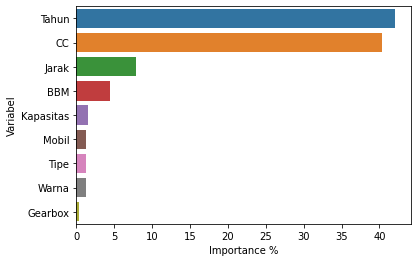

In [ ]:
ax = sns.barplot(x="Importance %", y="Variabel", data=df_new)
sns.color_palette("flare")
                 
plt.show()

In [ ]:
import pickle
# Saving model pickle
pickle.dump(rf_rs, open('model.pkl','wb'))